<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%201_Plot%20the%20graph%20of%20the%20DT%20%20fitting%20model%20on%20WSN-DS%20(11082023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import unique_labels
from imblearn.over_sampling import SMOTE
import collections as c

In [11]:
# Load the dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")

In [12]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X)
print(y)

[[1.0100000e+05 5.0000000e+01 1.0000000e+00 ... 1.3008535e+02
  0.0000000e+00 2.4694000e+00]
 [1.0100100e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  4.0000000e+00 6.9570000e-02]
 [1.0100200e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 6.8980000e-02]
 ...
 [2.0109800e+05 1.0030000e+03 0.0000000e+00 ... 1.3926438e+02
  1.0000000e+00 9.4370000e-02]
 [2.0109900e+05 1.0030000e+03 0.0000000e+00 ... 1.5827492e+02
  3.0000000e+00 1.6047000e-01]
 [2.0204100e+05 1.0250000e+03 0.0000000e+00 ... 1.1500407e+02
  0.0000000e+00 1.0132500e+00]]
[0 0 0 ... 0 0 0]


In [13]:
# Display class distribution before oversampling
counter = c.Counter(y)
print("Class distribution before oversampling:", counter)

Class distribution before oversampling: Counter({0: 340066, 1: 14596, 2: 10049, 3: 6638, 4: 3312})


In [14]:
# Oversample using SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [15]:
# Display class distribution after oversampling
counter = c.Counter(y_resampled)
print("Class distribution after oversampling:", counter)

Class distribution after oversampling: Counter({0: 340066, 4: 340066, 3: 340066, 1: 340066, 2: 340066})


In [16]:
# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=101)

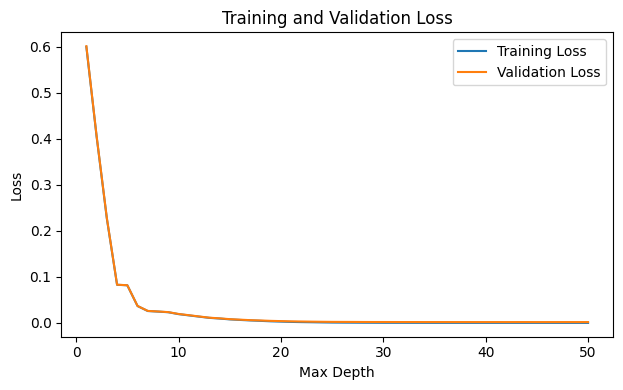

In [17]:
# Train multiple Decision Trees with varying depths
max_depths = range(1, 51)
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    # Training predictions
    y_train_pred = clf.predict(X_train)
    train_loss = np.mean(y_train_pred != y_train)
    train_losses.append(train_loss)

    train_accuracy = np.mean(y_train_pred == y_train)
    train_accuracies.append(train_accuracy)

    # Validation predictions
    y_val_pred = clf.predict(X_val)
    val_loss = np.mean(y_val_pred != y_val)
    val_losses.append(val_loss)

    val_accuracy = np.mean(y_val_pred == y_val)
    val_accuracies.append(val_accuracy)

# Plotting
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_losses, label='Training Loss')
plt.plot(max_depths, val_losses, label='Validation Loss')
plt.xlabel('Max Depth')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

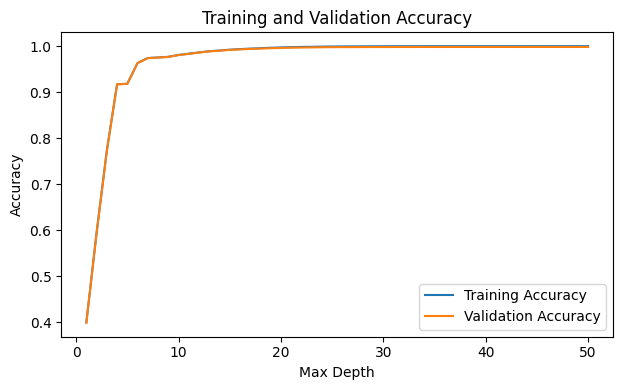

In [19]:
# Plotting
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

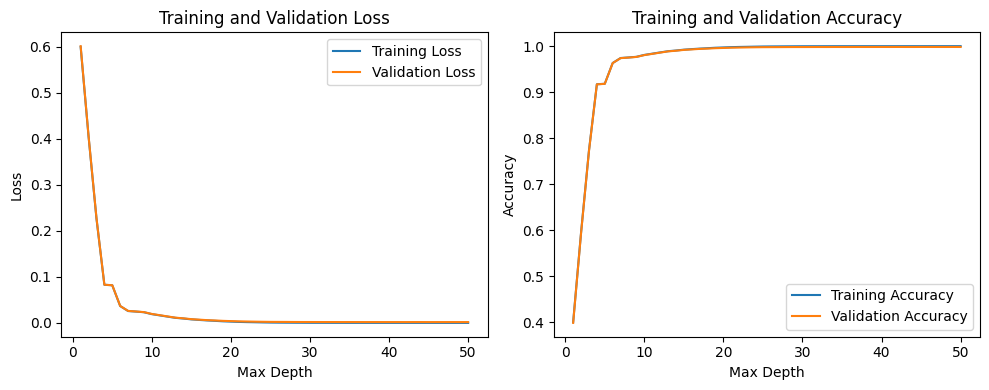

In [21]:
# Plotting
plt.figure(figsize=(10, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_losses, label='Training Loss')
plt.plot(max_depths, val_losses, label='Validation Loss')
plt.xlabel('Max Depth')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()